# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ferdiyansyah
- **Email:** ferdiyansyah5599@gmail.com
- **ID Dicoding:** ferdiyansyah_V8oc

## Menentukan Pertanyaan Bisnis

- Dari negara mana saja pelanggan berasal ?<br/>
> untuk mengidentifikasi persebaran lokasi pelanggan, yang nantinya dapat digunakan untuk melakukan promosi di lokasi yang persebarannya lebih kecil
- Apa metode pembayaran yang paling populer digunakan pelanggan ? <br/>
> untuk memahami preferensi pelanggan terhadap metode pembayaran. Nantinya hasil dari analisis dapat digunakan untuk membuat strategi promosi dan menjalin kemitraan dengan penyedia layanan terkait
- Bagaimana perbandingan jumlah transaksi antara pembayaran menggunakan kartu kredit dengan cicilan (> 1) dengan tanpa cicilan (==1)?
> untuk mengidentifikasi preferensi pelanggan kartu kredit yang berkaitan dengan dampak dari cicilan terhadap keputusan pelanggan
- Bagaimana perbandingan antara metode pembayaran yang digunakan pelanggan dengan rentang nilai pembayaran yang mereka keluarkan?
> untuk memahami pola perilaku pelangan dalam memilih metode pembayaran berdasarkan nilai transaksi yang dilakukan

## Import Semua Packages/Library yang Digunakan

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Data Wrangling

### Gathering Data

In [234]:
df_customer = pd.read_csv('data/olist_customers_dataset.csv')
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


> Dari tabel di atas kita dapat melihat sample 5 data teratas dari dataset customer

In [235]:
df_payment = pd.read_csv('data/olist_order_payments_dataset.csv')
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


> Dari tabel di atas kita dapat melihat sample 5 data teratas dari dataset order payment

### Assessing Data - Customer

In [236]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


> Dari informasi yang didapat di atas, kita dapat melihat tipe data yang digunakan pada dataset, jumlah data dan nama kolom. Dari informasi tersebut tidak ada yang aneh dari data

In [237]:
df_customer.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


> Dari informasi deskripsi data diatas terlihat rentang data yang terlihat sangat jauh dari rata-rata, nilai minumum dan nilai maksimum. Namun karena customer_zip_code_prefix (kode pos) merupakan data kategori (atau nominal), jadi rentang data yang jauh tidak akan mempengaruhi apapun. Karena seluruh data dari dataset merupakan data kategori jadi sudah dipastikan bahwa tidak ada outlier

In [238]:
df_customer.isnull().sum().sort_values(ascending=False)

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

> Dari informasi di atas dapat dipastikan bahwa tidak ada missing value dari dataset

In [239]:
df_customer.duplicated().sum()

0

> Dari informasi di atas dapat dipastikan bahwa tidak ada data duplikat dari dataset

### Assessing Data - Order Payments

In [240]:
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


> Dari informasi yang didapat di atas, kita dapat melihat tipe data yang digunakan pada dataset, jumlah data dan nama kolom. Dari informasi tersebut tidak ada yang aneh dari data

In [241]:
df_payment.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


> Dari informasi deskripsi data diatas terdapat anomali dari rentang ketiga features tersbut dapat dilihat misalnya pada features payment value rentang dari nilai maksimum terlampau sangat jauh dari nilai minimum, nilai rata-rata dan nilai persentil ke-75. Begitu juga dengan 2 features lainnya. Namun karena payment_Sequential merupakan ordinal data anomali tersebut tidak dapat dikatakan sebagai outlier. Hal ini dapat disimpulkan bahwa terdapat outlier pada features payment_installments dan payment_value . Untuk memvisualisasikannya dapat menggunakan diagram boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x200816ef110>,
 'caps': [<matplotlib.lines.Line2D at 0x200812d70d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x200816eca50>],
 'medians': [<matplotlib.lines.Line2D at 0x200812d4fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20084ebeed0>],
 'means': []}

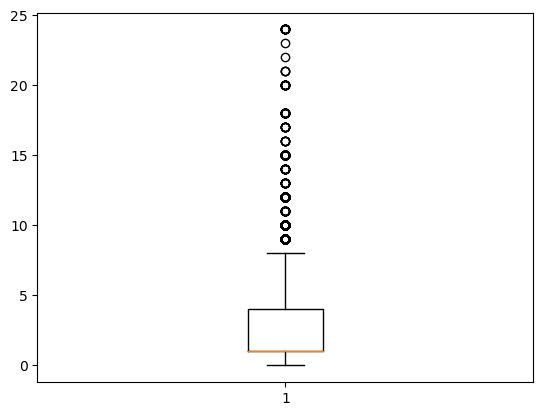

In [242]:
plt.boxplot(df_payment['payment_installments'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2008115ad90>,
 'caps': [<matplotlib.lines.Line2D at 0x20080fb0b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2008115b690>],
 'medians': [<matplotlib.lines.Line2D at 0x20080ea1fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20080ea17d0>],
 'means': []}

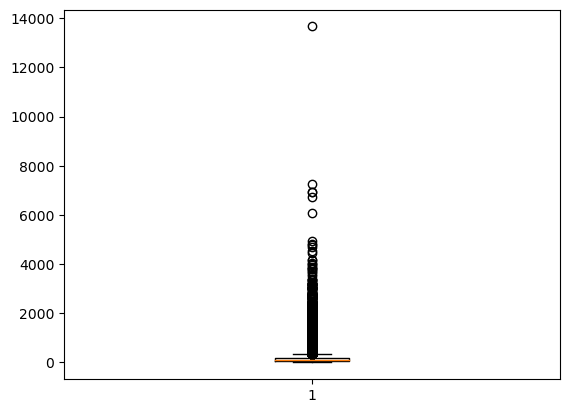

In [243]:
plt.boxplot(df_payment['payment_value'])

> Dari ketiga boxplot tersebut terlihat ada outlier yang signifikan dari setiap features, karena outlier terdapat pada nilai maksimum maka dalam kasus ini akan menggunakan Q3

In [244]:
df_payment.isnull().sum().sort_values(ascending=False)

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

> Dari informasi di atas dapat dipastikan bahwa tidak ada missing value dari dataset

In [245]:
df_payment.duplicated().sum()

0

> Dari informasi di atas dapat dipastikan bahwa tidak ada data duplikat dari dataset

### Cleaning Data - Customer

> Karena tidak ada anomali pada dataset customer maka tidak perlu dilakukan cleaning data

### Cleaning Data - Order Payments

In [246]:
df_payment.shape

(103886, 5)

#### Outlier payment_installments

In [247]:
q1 = df_payment['payment_installments'].quantile(0.25)
q3 = df_payment['payment_installments'].quantile(0.75)
q3

4.0

In [248]:
iqr = q3 - q1
iqr

3.0

In [249]:
outlierq3 = q3 + 1.5 * iqr
outlierq3

8.5

In [250]:
df_payment = df_payment[(df_payment['payment_installments'] < outlierq3)]

In [251]:
df_payment.shape

(97573, 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x20081b25b90>,
 'caps': [<matplotlib.lines.Line2D at 0x20081b24ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20081b24050>],
 'medians': [<matplotlib.lines.Line2D at 0x20080e94fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20081b26410>],
 'means': []}

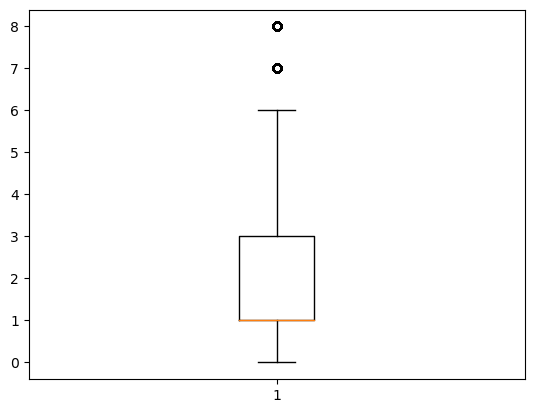

In [252]:
plt.boxplot(df_payment['payment_installments'])

> Setelah dilakukan proses penghapusan outlier, dapat dilihat pada diagram boxplot bahwa features payment_installments sudah aman dari global outlier, namun jika diliha pada diagram masih terlihat seeprti outlier hal tersebut wajar karena disini kita menggunakan perhitungan iqr dengan nilai faktor skala 1.5 (yang umum digunakan).  

#### Outlier payment_value

In [253]:
q1 = df_payment['payment_value'].quantile(0.25)
q3 = df_payment['payment_value'].quantile(0.75)
q3

162.19

In [254]:
iqr = q3 - q1
iqr

107.69

In [255]:
outlierq3 = q3 + 1.5 * iqr
outlierq3

323.725

In [256]:
df_payment = df_payment[(df_payment['payment_value'] < outlierq3)]

In [257]:
df_payment.shape

(90903, 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x200811e3450>,
 'caps': [<matplotlib.lines.Line2D at 0x200811a62d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x200811e3d50>],
 'medians': [<matplotlib.lines.Line2D at 0x200811a5b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x20081b27d10>],
 'means': []}

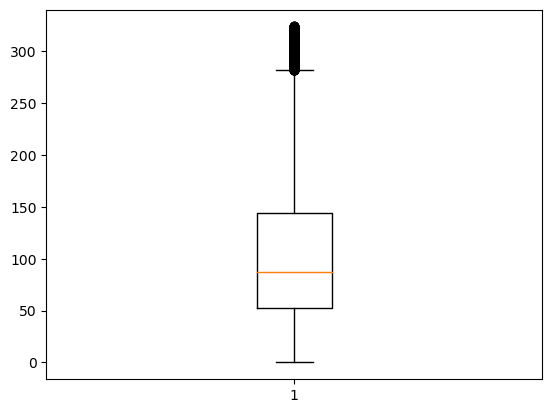

In [258]:
plt.boxplot(df_payment['payment_value'])

> Setelah dilakukan proses penghapusan outlier, dapat dilihat pada diagram boxplot bahwa features payment_value sudah aman dari global outlier, namun jika dilihat pada diagram masih terlihat seperti outlier hal tersebut wajar karena disini kita menggunakan perhitungan iqr dengan nilai faktor skala 1.5 (yang umum digunakan).  

In [259]:
df_payment.describe()

,payment_sequential,payment_installments,payment_value
count,90903.000000,90903.000000,90903.000000
mean,1.104716,2.271564,104.818529
std,0.753744,1.866900,68.458026
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,52.130000
50%,1.000000,1.000000,87.350000
75%,1.000000,3.000000,143.890000
max,29.000000,8.000000,323.720000


> Dari deskripsi data pun sudah tidak lagi terlihat rentang data yang terlampau jauh pada kedua features tersebut

## Exploratory Data Analysis (EDA)

### Explore ...

In [260]:
df_customer.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [261]:
cs = df_customer.groupby(['customer_state']).size().sort_values(ascending=False)
cs

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
dtype: int64

In [262]:
q1 = cs.quantile(0.25)
q2 = cs.quantile(0.50)
q3 = cs.quantile(0.75)
rt = cs.mean()

print("Persentil 25: {}".format(q1))
print("Persentil 50: {}".format(q2))
print("Persentil 75: {}".format(q3))
print("Rarta-Rata: {}".format(rt))

Persentil 25: 381.5
Persentil 50: 907.0
Persentil 75: 2760.0
Rarta-Rata: 3683.0


> Berdasarkan data, negara bagian SP memiliki jumlah pelanggan tertinggi, sedangkan RR memiliki jumlah pelanggan terendah. Untuk meningkatkan jumlah pelanggan di negara bagian dengan kinerja di bawah rata-rata atau bisa juga yang berada dibawah persentil 1 (Q1), dapat dilakukan strategi promosi yang lebih intensif. Dengan demikian, diharapkan produk dapat lebih dikenal luas di seluruh wilayah.

In [263]:
cs[cs < q1]

customer_state
SE    350
TO    280
RO    253
AM    148
AC     81
AP     68
RR     46
dtype: int64

> Daftar negara bagian yang lebih kecil dari Q1

In [264]:
cs[cs < rt]

customer_state
SC    3637
BA    3380
DF    2140
ES    2033
GO    2020
PE    1652
CE    1336
PA     975
MT     907
MA     747
MS     715
PB     536
PI     495
RN     485
AL     413
SE     350
TO     280
RO     253
AM     148
AC      81
AP      68
RR      46
dtype: int64

> Daftar negara bagian yang lebih kecil dari rata-rata

In [265]:
df_payment.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,90903,90903.000000,90903,90903.000000,90903.000000
unique,86707,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,65448,NaN,NaN
mean,NaN,1.104716,NaN,2.271564,104.818529
std,NaN,0.753744,NaN,1.866900,68.458026
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,52.130000
50%,NaN,1.000000,NaN,1.000000,87.350000
75%,NaN,1.000000,NaN,3.000000,143.890000


In [266]:
pt = df_payment.groupby(['payment_type']).size().sort_values(ascending=False)
pt

payment_type
credit_card    65448
boleto         18342
voucher         5674
debit_card      1436
not_defined        3
dtype: int64

> Berdasarkan informasi tersebut dapat dilihat bahwa kartu kredit mrupakan pilihan terbanyak dari pengguna

In [267]:
count_with_installments = df_payment[(df_payment['payment_type'] == 'credit_card') & (df_payment['payment_installments'] > 1)].shape[0]
count_without_installments = df_payment[(df_payment['payment_type'] == 'credit_card') & (df_payment['payment_installments'] == 1)].shape[0]

print("Jumlah transaksi dengan kartu kredit yang di angsur: {}".format(count_with_installments))
print("Jumlah transaksi dengan kartu kredit yang tidak di angsur: {}".format(count_without_installments))

Jumlah transaksi dengan kartu kredit yang di angsur: 40665
Jumlah transaksi dengan kartu kredit yang tidak di angsur: 24781


> Berdasarkan data tersebut di dapat sebuah informasi bahwa sebagian besar pengguna yang mengunakan akrtu kredit akan mengangsur pembayarannya. Hal ini dapat digunakan untuk strategi bisnis dengan memberikan beberapa keuntungan atau promosi kepada pengguna yang menggunakan kartu kredit dan mengangsur pembayarannya seperti misalnya diberi bonus tertentu atau meningkatkan branding dalam hal itu

In [268]:
q1_pv = df_payment['payment_value'].quantile(0.25)
q2_pv = df_payment['payment_value'].quantile(0.50)
q3_pv = df_payment['payment_value'].quantile(0.75)
q1_pv

52.13

In [269]:
bins = [0, q1_pv, q2_pv, q3_pv, np.inf]
labels = ['Low (0 - {})'.format(q1_pv), 'Medium ({} - {})'.format(q1_pv, q2_pv), 'High ({} - {})'.format(q2_pv, q3_pv), 'Very High ({}+)'.format(q3_pv)]
df_payment['payment_value_bin'] = pd.cut(df_payment['payment_value'], bins=bins, labels=labels)
distribution_per_bin = df_payment.groupby(['payment_value_bin', 'payment_type']).size().unstack().fillna(0)
distribution_per_bin['Total'] = distribution_per_bin.sum(axis=1)
distribution_per_bin

payment_type,boleto,credit_card,debit_card,not_defined,voucher,Total
payment_value_bin,,,,,,
Low (0 - 52.13),4367,14321,394,0,3650,22732
Medium (52.13 - 87.35),4861,16696,353,0,801,22711
High (87.35 - 143.89),4674,16923,347,0,782,22726
Very High (143.89+),4440,17508,342,0,435,22725


> Berdasarkan informasi diatas didapatkan hubungan antara jumlah pengguna dalam menggunakan metode pembayaran dengan besarnya uang yang di keluarkan berdasrkan persenil (Q1, Q2, Q3). Dapat dilihat dari total transaksi per kelompok nominal terlihat cukup merata.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dari negara mana saja pelanggan berasal ?

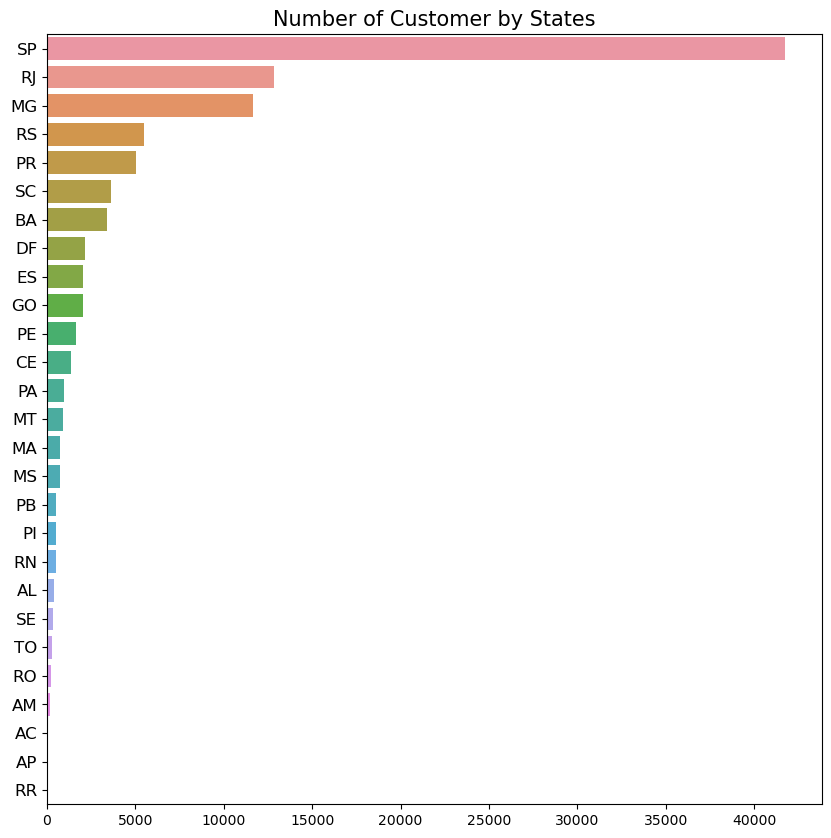

In [270]:
state_df = df_customer.groupby(by="customer_state").customer_id.nunique().reset_index()
state_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
state_df
plt.figure(figsize=(10, 10))
sns.barplot(
    x="customer_count", 
    y="customer_state",
    data=state_df.sort_values(by="customer_count", ascending=False),
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [271]:
state_df.head()

,customer_state,customer_count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380


> Berdasarkan grafik, negara bagian SP memiliki jumlah pelanggan tertinggi, sedangkan RR memiliki jumlah pelanggan terendah. 

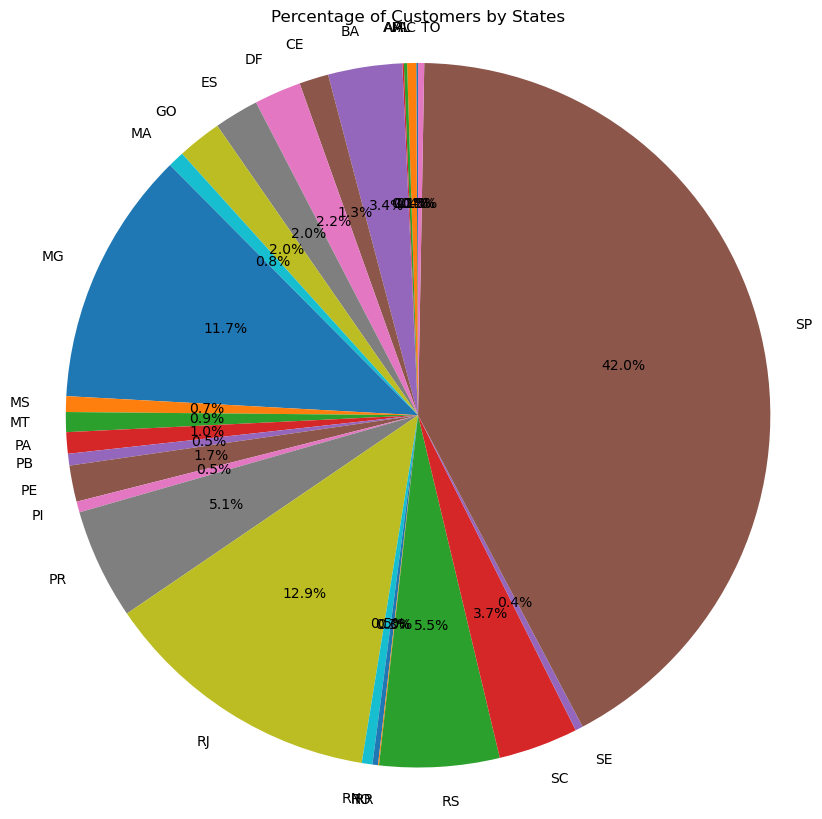

In [272]:
plt.figure(figsize=(10, 10))
plt.pie(state_df['customer_count'], labels=state_df['customer_state'], autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Customers by States")
plt.axis('equal') 
plt.show()

> Visualisasi data seperti ini juga dapat menrgunakan pie chart seperti diatas, namun karena persebaran data yang terlalu luas, pychart sangat tidak di rekomendasikan karena akan membuat grafik visual menumpuk dan sulit dibaca seperti yang terjadi di atas

### Pertanyaan 2: Apa metode pembayaran yang paling populer digunakan pelanggan ?

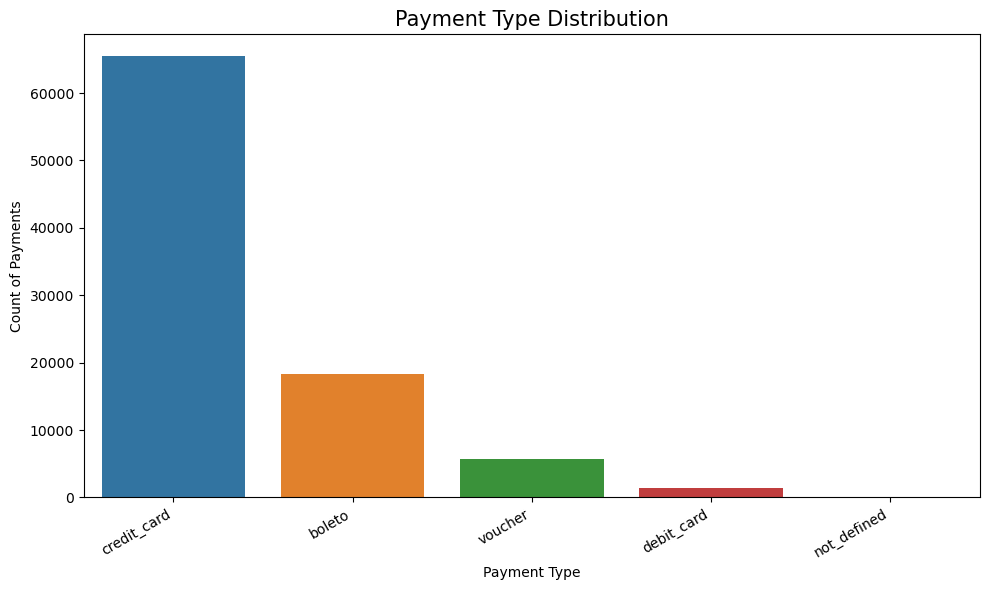

In [273]:
pt = df_payment.groupby(['payment_type']).size().sort_values(ascending=False).reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(
    x='payment_type', 
    y='count', 
    data=pt
)

plt.title("Payment Type Distribution", fontsize=15)
plt.xlabel("Payment Type")
plt.ylabel("Count of Payments")

plt.xticks(rotation=30, ha="right") 
plt.tight_layout()
plt.show()

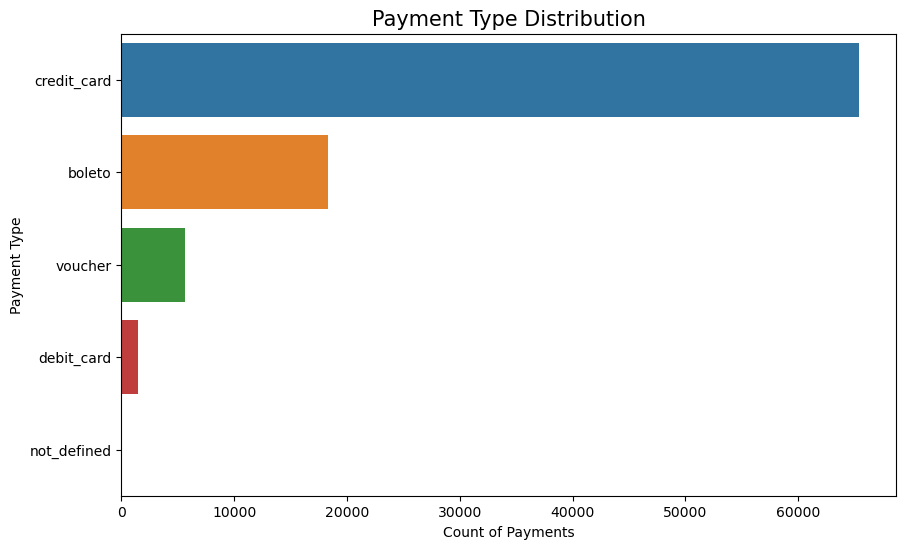

In [274]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y='payment_type', 
    data=df_payment, 
    order=df_payment['payment_type'].value_counts().index
)

plt.title("Payment Type Distribution", fontsize=15)
plt.xlabel("Count of Payments")
plt.ylabel("Payment Type")
plt.show()

> Dari hail visualisasi tersebut dapat dikatakan bahwa kartu kredit merupakan metode yang paling banyak dipilih oleh pengguna dan yang paling sedikit yaitu dengan debit_card (menghiraukan yang tidak terdefinisi)

### Pertanyaan 3: Bagaimana perbandingan jumlah transaksi antara pembayaran menggunakan kartu kredit dengan cicilan (> 1) dengan tanpa cicilan (==1)?

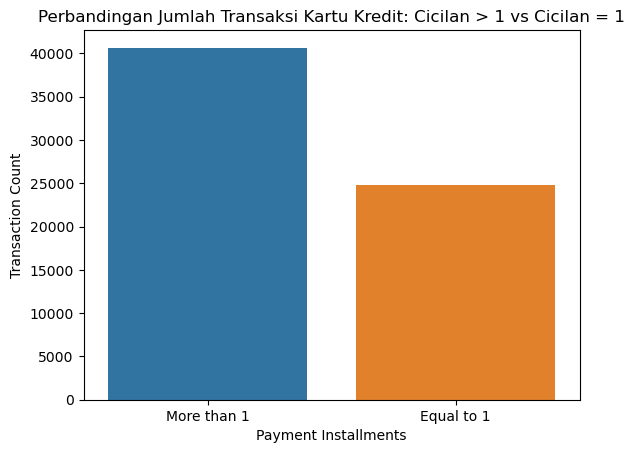

In [275]:
# Variable count_with_installments dan count_without_installments menggunakan yang sudah di definisikan diatas
data = {'Payment Installments': ['More than 1', 'Equal to 1'],
        'Transaction Count': [count_with_installments, count_without_installments]}
df_count = pd.DataFrame(data)

# Visualisasi bar plot
sns.barplot(x='Payment Installments', y='Transaction Count', data=df_count)
plt.title("Perbandingan Jumlah Transaksi Kartu Kredit: Cicilan > 1 vs Cicilan = 1")
plt.xlabel("Payment Installments")
plt.ylabel("Transaction Count")
plt.show()

> Berdasarkan grafik tersebut di dapat sebuah informasi bahwa sebagian besar pengguna yang mengunakan akrtu kredit akan mengangsur pembayarannya. Hal ini dapat digunakan untuk strategi bisnis dengan memberikan beberapa keuntungan atau promosi kepada pengguna yang menggunakan kartu kredit dan mengangsur pembayarannya seperti misalnya diberi bonus tertentu atau meningkatkan branding dalam hal itu

### Pertanyaan 4: Bagaimana perbandingan antara metode pembayaran yang digunakan pelanggan dengan rentang nilai pembayaran yang mereka keluarkan?

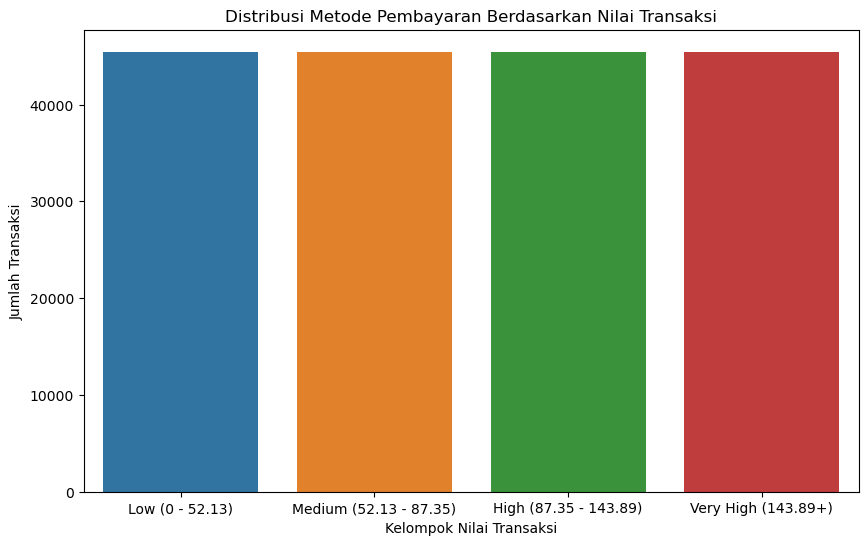

In [276]:
# Variable distribution_per_bin menggunakan yang sudah di definisikan diatas
plt.figure(figsize=(10,6))
sns.barplot(x=distribution_per_bin.index, y=distribution_per_bin.sum(axis=1))
plt.title('Distribusi Metode Pembayaran Berdasarkan Nilai Transaksi')
plt.xlabel('Kelompok Nilai Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.show()

> Dari grafik tersebut persebaran nilai transasksi dengan jumlah transaksi terlihat cukup merata

## Analisis Lanjutan (Opsional)

## Conclusion

- Dari negara mana saja pelanggan berasal ?
> Berdasarkan hasil analisa, negara bagian SP memiliki jumlah pelanggan tertinggi, sedangkan RR memiliki jumlah pelanggan terendah. Dalam hal ini dapat dilakukan prmosi yang lebih mendalam terhdap negara bagian yang masih dibawah nilai Q1, agar persebaran produk lebih luas dan produk akan lebih dikenal oleh masyarakat
- Apa metode pembayaran yang paling populer digunakan pelanggan ? <br/>
> Berdasarkan hasil analisa, metode pembayran yang paling populer adalah dengan menggunakan akrtu kredit. Dari hasil tersebut dapat digunakan untuk strategi marketing untuk membuat promosi yang menguntungkan pengguna kartu kredit dan melakukan mitra dengan penyedia kartu kredit untuk mendapatkan keuntungan yang lebih baik
- Bagaimana perbandingan jumlah transaksi antara pembayaran menggunakan kartu kredit dengan cicilan (> 1) dengan tanpa cicilan (==1)?
> Berdasarkan hasil analisa, di dapat sebuah informasi bahwa sebagian besar pengguna yang mengunakan akrtu kredit akan mengangsur pembayarannya. Hal ini dapat digunakan untuk strategi bisnis dengan memberikan beberapa keuntungan atau promosi kepada pengguna yang menggunakan kartu kredit dan mengangsur pembayarannya seperti misalnya diberi bonus tertentu atau meningkatkan branding dalam hal itu
- Bagaimana perbandingan antara metode pembayaran yang digunakan pelanggan dengan rentang nilai pembayaran yang mereka keluarkan?
> Berdasarkan ahsil analisa, persebaran nilai transaksi dengan jumlah taransaksi terlihat cukup merata dari berbagai rentang kelompok transaksi